In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import argparse

# Opens the Video file
cap = cv2.VideoCapture('face2-ideal-from-0.83333-to-1-alpha-50-level-6-chromAtn-1.avi')
facePath = "cascode/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(facePath)

In [37]:
# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not
ref_point = []
cropping = False

def shape_selection(event, x, y, flags, param):
  # grab references to the global variables
  global ref_point, cropping

  # if the left mouse button was clicked, record the starting
  # (x, y) coordinates and indicate that cropping is being
  # performed
  if event == cv2.EVENT_LBUTTONDOWN:
    ref_point = [(x, y)]
    cropping = True

  # check to see if the left mouse button was released
  elif event == cv2.EVENT_LBUTTONUP:
    # record the ending (x, y) coordinates and indicate that
    # the cropping operation is finished
    ref_point.append((x, y))
    cropping = False

    # draw a rectangle around the region of interest
    cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
    cv2.imshow("image", image)

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = cv2.imread(args["image"])
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)

# keep looping until the 'q' key is pressed
while True:
  # display the image and wait for a keypress
  cv2.imshow("image", image)
  key = cv2.waitKey(1) & 0xFF

  # if the 'r' key is pressed, reset the cropping region
  if key == ord("r"):
    image = clone.copy()

  # if the 'c' key is pressed, break from the loop
  elif key == ord("c"):
    break

# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(ref_point) == 2:
  crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
  cv2.imshow("crop_img", crop_img)
  cv2.waitKey(0)

# close all open windows
cv2.destroyAllWindows()

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

C:\Users\SP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [36]:
# x = int((face_289[21][0]+face_289[22][0])/2)
# y = int((face_289[21][1]+face_289[22][1])/2)
# w = abs(face_289[39][0]-face_289[42][0])
# h = abs(y-face_289[29][1])

# y_mid = int((y + (y - h)) / 2)
# roi = image[y-h:y_mid,int(x-w/2):int(x+w/2)]

# if(roi.shape[0] !=0 and roi.shape[1] != 0):
#     roi = imutils.resize(roi, width=250, inter=cv2.INTER_CUBIC)
#     cv2.imshow('ROI', roi)

# cv2.rectangle(image,(int(x-w/2), int(y-h)), (int(x + w/2), y_mid), (0, 0, 255), 1)
# cv2.imshow('Image', image)

In [42]:
i=0
pix_aver = []
while(cap.isOpened()):
    # read frame and check end
    ret, frame = cap.read()
    if ret == False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, scaleFactor= 1.05,
                                         minNeighbors=8, minSize=(55, 55), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]    
        cv2.imwrite(f'mmm/face_{i}.jpg', roi_color)
        
        pix_aver.append(np.mean(roi_gray))
    
    i+=1

cap.release()
cv2.destroyAllWindows()

In [5]:
ret, frame = cap.read()

In [6]:
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
length = int(cv2.VideoCapture.get(cap, property_id))
print( length )

0


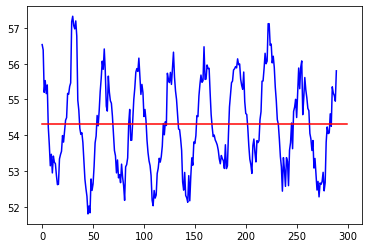

In [7]:
t = np.linspace(1,10,300)
plt.plot(pix_aver, 'b-')
horiz_l1 = np.array([np.mean(pix_aver) for i in range(len(t))])
plt.plot(horiz_l1, 'r')
plt.show()

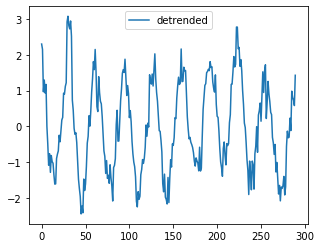

In [8]:
from scipy import signal
pix_detrended = signal.detrend(pix_aver)
plt.figure(figsize=(5, 4))
plt.plot(pix_detrended, label="detrended")
plt.legend(loc='best')
plt.show()

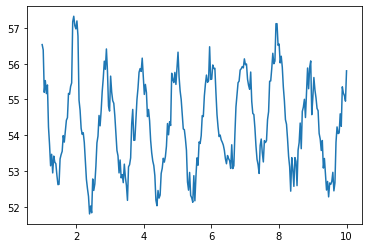

In [9]:
t = np.linspace(1,10,290)
pix_aver = np.array(pix_aver)
plt.plot(t,pix_aver)

32.11111111111108
0.11072796934865888
290
145.0


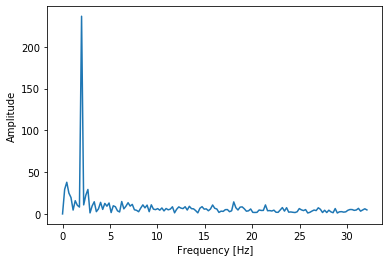

9
The heart rate in bpm is 59.793103448275794


In [13]:
fft = np.fft.fft(pix_detrended)
# for i in range(2):
#     print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))
T = t[1] - t[0]  # sampling interval 
print(1/T)
print(1/(290*T))
print(len(t))
N = pix_detrended.size/2
print(N)
# 1/T = frequency
f = np.linspace(0, 1 / T, N)
# print(np.abs(fft[0:150]))

plt.plot(f, np.abs(fft[0:145]))  # 1 / N is a normalization factor

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.show()
np.max(abs(fft))
index = np.argmax(fft[0:150])
print(index)
print("The heart rate in bpm is", index*60/(290*T))

In [38]:
# np.abs(fft) / N

In [39]:
np.mean(pix_aver)

54.30322177803264

In [2]:
# def dL_dw(x, e, w):
#     return -2*x.T.dot(e)/len(x)

In [ ]:
# def SGD(gamma = 1e-3, n_epochs = 100, batch_size = 2, decay = 0.9):
#     epoch_numbers = int(len(x)/batch_size)
#     w = np.random.randn(D, 1)
#     params = []
#     loss = np.zeros((n_epochs, 1))
#     for i in range(n_epochs):
#         params.append(w)
        
#         for j in range(epoch_run):
#             idx = np.random.choice(len(x), batch_size, replace=False)
#             e = y_obs[idx] - x[idx].dot(w)
#             w = w - gamma*dL_dw(x[idx], e, w)
#         loss[i] = e.T.dot(e)/len(e)
#         gamma = gamma * decay
#     return params, loss

# params, loss = gradient_descent()

In [14]:
# Opens the Video file
cap = cv2.VideoCapture('1_1_1_1_22-ideal-from-0.83333-to-1-alpha-50-level-6-chromAtn-1 (1).avi')
facePath = "cascode/haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(facePath)

In [15]:
# initialize the list of reference points and boolean indicating
# whether cropping is being performed or not
ref_point = []
cropping = False

def shape_selection(event, x, y, flags, param):
  # grab references to the global variables
  global ref_point, cropping

  # if the left mouse button was clicked, record the starting
  # (x, y) coordinates and indicate that cropping is being
  # performed
  if event == cv2.EVENT_LBUTTONDOWN:
    ref_point = [(x, y)]
    cropping = True

  # check to see if the left mouse button was released
  elif event == cv2.EVENT_LBUTTONUP:
    # record the ending (x, y) coordinates and indicate that
    # the cropping operation is finished
    ref_point.append((x, y))
    cropping = False

    # draw a rectangle around the region of interest
    cv2.rectangle(image, ref_point[0], ref_point[1], (0, 255, 0), 2)
    cv2.imshow("image", image)

# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
args = vars(ap.parse_args())

# load the image, clone it, and setup the mouse callback function
image = cv2.imread(args["image"])
clone = image.copy()
cv2.namedWindow("image")
cv2.setMouseCallback("image", shape_selection)

# keep looping until the 'q' key is pressed
while True:
  # display the image and wait for a keypress
  cv2.imshow("image", image)
  key = cv2.waitKey(1) & 0xFF

  # if the 'r' key is pressed, reset the cropping region
  if key == ord("r"):
    image = clone.copy()

  # if the 'c' key is pressed, break from the loop
  elif key == ord("c"):
    break

# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(ref_point) == 2:
  crop_img = clone[ref_point[0][1]:ref_point[1][1], ref_point[0][0]:ref_point[1][0]]
  cv2.imshow("crop_img", crop_img)
  cv2.waitKey(0)

# close all open windows
cv2.destroyAllWindows()

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

C:\Users\SP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [16]:
i=0
pix_aver = []
while(cap.isOpened()):
    # read frame and check end
    ret, frame = cap.read()
    if ret == False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, scaleFactor= 1.05,
                                         minNeighbors=8, minSize=(55, 55), flags=cv2.CASCADE_SCALE_IMAGE)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]    
        cv2.imwrite(f'new/face_{i}.jpg', roi_color)
        
        pix_aver.append(np.mean(roi_gray))
    
    i+=1

cap.release()
cv2.destroyAllWindows()

In [17]:
ret, frame = cap.read()
property_id = int(cv2.CAP_PROP_FRAME_COUNT) 
length = int(cv2.VideoCapture.get(cap, property_id))
print( length )

0


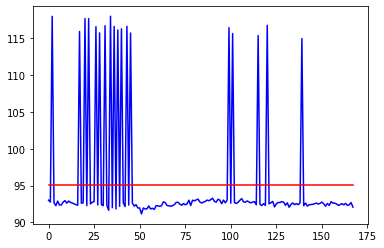

In [18]:
t = np.linspace(1,10,168)
plt.plot(pix_aver, 'b-')
horiz_l1 = np.array([np.mean(pix_aver) for i in range(len(t))])
plt.plot(horiz_l1, 'r')
plt.show()


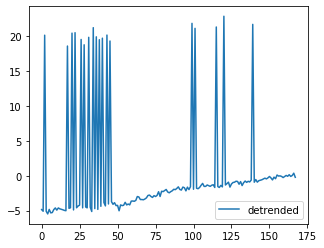

In [32]:
from scipy import signal
pix_detrended1 = signal.detrend(pix_aver)
plt.figure(figsize=(5, 4))
plt.plot(pix_detrended, label="detrended")
plt.legend(loc='best')
plt.show()

18.555555555555525
0.1237037037037035
168
168


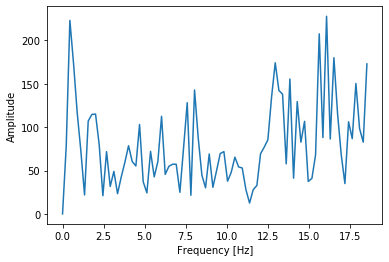

2
The heart rate in bpm is 14.84444444444442


In [34]:
fft = np.fft.fft(pix_detrended1)
# for i in range(2):
#     print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))
T = t[1] - t[0]  # sampling interval 
print(1/T)
print(1/(150*T))
print(len(t))
N = pix_detrended1.size
print(N)
# 1/T = frequency
f = np.linspace(0, 1 / T, N/2)
# print(np.abs(fft[0:150]))

plt.plot(f, np.abs(fft[0:84]))  # 1 / N is a normalization factor

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.show()
np.max(abs(fft[0:84]))
index = np.argmax(abs(fft[0:50]))
print(index)
print("The heart rate in bpm is", index*60*1/(150*T))